<a href="https://colab.research.google.com/github/Reventh-Sharma/COVID-19-Global-Prediction/blob/master/COVID19_Global_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train=pd.read_csv("/content/drive/My Drive/Assignments/Kaggle/train.csv")
test=pd.read_csv("/content/drive/My Drive/Assignments/Kaggle/test.csv")
recovered=pd.read_csv("/content/drive/My Drive/Assignments/Kaggle/covid_19_clean_complete.csv")

In [ ]:
'''Let's see what the data looks like'''

In [ ]:
train

Id Province/State  ... ConfirmedCases  Fatalities
0          1            NaN  ...            0.0         0.0
1          2            NaN  ...            0.0         0.0
2          3            NaN  ...            0.0         0.0
3          4            NaN  ...            0.0         0.0
4          5            NaN  ...            0.0         0.0
...      ...            ...  ...            ...         ...
16751  26374            NaN  ...            0.0         0.0
16752  26375            NaN  ...            0.0         0.0
16753  26376            NaN  ...            2.0         0.0
16754  26377            NaN  ...            2.0         0.0
16755  26378            NaN  ...            2.0         0.0

[16756 rows x 8 columns]

In [ ]:
test

ForecastId Province/State Country/Region      Lat     Long        Date
0               1            NaN    Afghanistan  33.0000  65.0000  2020-03-12
1               2            NaN    Afghanistan  33.0000  65.0000  2020-03-13
2               3            NaN    Afghanistan  33.0000  65.0000  2020-03-14
3               4            NaN    Afghanistan  33.0000  65.0000  2020-03-15
4               5            NaN    Afghanistan  33.0000  65.0000  2020-03-16
...           ...            ...            ...      ...      ...         ...
12207       12208            NaN         Zambia -15.4167  28.2833  2020-04-19
12208       12209            NaN         Zambia -15.4167  28.2833  2020-04-20
12209       12210            NaN         Zambia -15.4167  28.2833  2020-04-21
12210       12211            NaN         Zambia -15.4167  28.2833  2020-04-22
12211       12212            NaN         Zambia -15.4167  28.2833  2020-04-23

[12212 rows x 6 columns]

In [ ]:
recovered

Province/State         Country/Region  ...  Deaths  Recovered
0                NaN               Thailand  ...     0.0        0.0
1                NaN                  Japan  ...     0.0        0.0
2                NaN              Singapore  ...     0.0        0.0
3                NaN                  Nepal  ...     0.0        0.0
4                NaN               Malaysia  ...     0.0        0.0
...              ...                    ...  ...     ...        ...
19215            NaN                 Jersey  ...     0.0        0.0
19216            NaN            Puerto Rico  ...     1.0        0.0
19217            NaN  Republic of the Congo  ...     0.0        0.0
19218            NaN            The Bahamas  ...     0.0        0.0
19219            NaN             The Gambia  ...     0.0        0.0

[19220 rows x 8 columns]

In [ ]:
'''Any specifity to null Values? It seems so'''

In [ ]:
train[train[['Lat','Long', 'ConfirmedCases', 'Fatalities']].isnull().any(axis=1)]

Id Province/State Country/Region  ...        Date  ConfirmedCases Fatalities
413  652            NaN          Aruba  ...  2020-01-22             0.0        0.0
414  653            NaN          Aruba  ...  2020-01-23             0.0        0.0
415  654            NaN          Aruba  ...  2020-01-24             0.0        0.0
416  655            NaN          Aruba  ...  2020-01-25             0.0        0.0
417  656            NaN          Aruba  ...  2020-01-26             0.0        0.0
418  657            NaN          Aruba  ...  2020-01-27             0.0        0.0
419  658            NaN          Aruba  ...  2020-01-28             0.0        0.0
420  659            NaN          Aruba  ...  2020-01-29             0.0        0.0
421  660            NaN          Aruba  ...  2020-01-30             0.0        0.0
422  661            NaN          Aruba  ...  2020-01-31             0.0        0.0
423  662            NaN          Aruba  ...  2020-02-01             0.0        0.0
424  663            NaN          Aruba  ...  2020-02-02             0.0        0.0
425  664            NaN          Aruba  ...  2020-02-03             0.0        0.0
426  665            NaN          Aruba  ...  2020-02-04             0.0        0.0
427  666            NaN          Aruba  ...  2020-02-05             0.0        0.0
428  667            NaN          Aruba  ...  2020-02-06             0.0        0.0
429  668            NaN          Aruba  ...  2020-02-07             0.0        0.0
430  669            NaN          Aruba  ...  2020-02-08             0.0        0.0
431  670            NaN          Aruba  ...  2020-02-09             0.0        0.0
432  671            NaN          Aruba  ...  2020-02-10             0.0        0.0
433  672            NaN          Aruba  ...  2020-02-11             0.0        0.0
434  673            NaN          Aruba  ...  2020-02-12             0.0        0.0
435  674            NaN          Aruba  ...  2020-02-13             0.0        0.0
436  675            NaN          Aruba  ...  2020-02-14             0.0        0.0
437  676            NaN          Aruba  ...  2020-02-15             0.0        0.0
438  677            NaN          Aruba  ...  2020-02-16             0.0        0.0
439  678            NaN          Aruba  ...  2020-02-17             0.0        0.0
440  679            NaN          Aruba  ...  2020-02-18             0.0        0.0
441  680            NaN          Aruba  ...  2020-02-19             0.0        0.0
442  681            NaN          Aruba  ...  2020-02-20             0.0        0.0
443  682            NaN          Aruba  ...  2020-02-21             0.0        0.0
444  683            NaN          Aruba  ...  2020-02-22             0.0        0.0
445  684            NaN          Aruba  ...  2020-02-23             0.0        0.0
446  685            NaN          Aruba  ...  2020-02-24             0.0        0.0
447  686            NaN          Aruba  ...  2020-02-25             0.0        0.0
448  687            NaN          Aruba  ...  2020-02-26             0.0        0.0
449  688            NaN          Aruba  ...  2020-02-27             0.0        0.0
450  689            NaN          Aruba  ...  2020-02-28             0.0        0.0
451  690            NaN          Aruba  ...  2020-02-29             0.0        0.0
452  691            NaN          Aruba  ...  2020-03-01             0.0        0.0
453  692            NaN          Aruba  ...  2020-03-02             0.0        0.0
454  693            NaN          Aruba  ...  2020-03-03             0.0        0.0
455  694            NaN          Aruba  ...  2020-03-04             0.0        0.0
456  695            NaN          Aruba  ...  2020-03-05             0.0        0.0
457  696            NaN          Aruba  ...  2020-03-06             0.0        0.0
458  697            NaN          Aruba  ...  2020-03-07             0.0        0.0
459  698            NaN          Aruba  ...  2020-03-08             0.0        0.0
460  699            Na

In [ ]:
train[train['Province/State']=='Aruba']

Id Province/State  ... ConfirmedCases  Fatalities
9735  15346          Aruba  ...            0.0         0.0
9736  15347          Aruba  ...            0.0         0.0
9737  15348          Aruba  ...            0.0         0.0
9738  15349          Aruba  ...            0.0         0.0
9739  15350          Aruba  ...            0.0         0.0
9740  15351          Aruba  ...            0.0         0.0
9741  15352          Aruba  ...            0.0         0.0
9742  15353          Aruba  ...            0.0         0.0
9743  15354          Aruba  ...            0.0         0.0
9744  15355          Aruba  ...            0.0         0.0
9745  15356          Aruba  ...            0.0         0.0
9746  15357          Aruba  ...            0.0         0.0
9747  15358          Aruba  ...            0.0         0.0
9748  15359          Aruba  ...            0.0         0.0
9749  15360          Aruba  ...            0.0         0.0
9750  15361          Aruba  ...            0.0         0.0
9751  15362          Aruba  ...            0.0         0.0
9752  15363          Aruba  ...            0.0         0.0
9753  15364          Aruba  ...            0.0         0.0
9754  15365          Aruba  ...            0.0         0.0
9755  15366          Aruba  ...            0.0         0.0
9756  15367          Aruba  ...            0.0         0.0
9757  15368          Aruba  ...            0.0         0.0
9758  15369          Aruba  ...            0.0         0.0
9759  15370          Aruba  ...            0.0         0.0
9760  15371          Aruba  ...            0.0         0.0
9761  15372          Aruba  ...            0.0         0.0
9762  15373          Aruba  ...            0.0         0.0
9763  15374          Aruba  ...            0.0         0.0
9764  15375          Aruba  ...            0.0         0.0
9765  15376          Aruba  ...            0.0         0.0
9766  15377          Aruba  ...            0.0         0.0
9767  15378          Aruba  ...            0.0         0.0
9768  15379          Aruba  ...            0.0         0.0
9769  15380          Aruba  ...            0.0         0.0
9770  15381          Aruba  ...            0.0         0.0
9771  15382          Aruba  ...            0.0         0.0
9772  15383          Aruba  ...            0.0         0.0
9773  15384          Aruba  ...            0.0         0.0
9774  15385          Aruba  ...            0.0         0.0
9775  15386          Aruba  ...            0.0         0.0
9776  15387          Aruba  ...            0.0         0.0
9777  15388          Aruba  ...            0.0         0.0
9778  15389          Aruba  ...            0.0         0.0
9779  15390          Aruba  ...            0.0         0.0
9780  15391          Aruba  ...            0.0         0.0
9781  15392          Aruba  ...            0.0         0.0
9782  15393          Aruba  ...            0.0         0.0
9783  15394          Aruba  ...            0.0         0.0
9784  15395          Aruba  ...            0.0         0.0
9785  15396          Aruba  ...            0.0         0.0
9786  15397          Aruba  ...            2.0         0.0
9787  15398          Aruba  ...            2.0         0.0
9788  15399          Aruba  ...            2.0         0.0
9789  15400          Aruba  ...            2.0         0.0
9790  15401          Aruba  ...            3.0         0.0
9791  15402          Aruba  ...            4.0         0.0
9792  15403          Aruba  ...            4.0         0.0
9793  15404          Aruba  ...            5.0         0.0

[59 rows x 8 columns]

In [ ]:
'''Basically Aruba recorded 2 times, as coutry/region as well as province/ state'''

In [ ]:
train.drop(train[train['Country/Region']=='Aruba'].index, inplace=True) 
train[train[['Lat','Long', 'ConfirmedCases', 'Fatalities']].isnull().any(axis=1)]

Empty DataFrame
Columns: [Id, Province/State, Country/Region, Lat, Long, Date, ConfirmedCases, Fatalities]
Index: []

In [ ]:
'''Change Korea, South to South Korea'''

In [ ]:
train.loc[train['Country/Region']=='Korea, South',['Country/Region']]='South Korea'

In [ ]:
test[test[['Lat','Long']].isnull().any(axis=1)]

ForecastId Province/State Country/Region  Lat  Long        Date
301         302            NaN          Aruba  NaN   NaN  2020-03-12
302         303            NaN          Aruba  NaN   NaN  2020-03-13
303         304            NaN          Aruba  NaN   NaN  2020-03-14
304         305            NaN          Aruba  NaN   NaN  2020-03-15
305         306            NaN          Aruba  NaN   NaN  2020-03-16
306         307            NaN          Aruba  NaN   NaN  2020-03-17
307         308            NaN          Aruba  NaN   NaN  2020-03-18
308         309            NaN          Aruba  NaN   NaN  2020-03-19
309         310            NaN          Aruba  NaN   NaN  2020-03-20
310         311            NaN          Aruba  NaN   NaN  2020-03-21
311         312            NaN          Aruba  NaN   NaN  2020-03-22
312         313            NaN          Aruba  NaN   NaN  2020-03-23
313         314            NaN          Aruba  NaN   NaN  2020-03-24
314         315            NaN          Aruba  NaN   NaN  2020-03-25
315         316            NaN          Aruba  NaN   NaN  2020-03-26
316         317            NaN          Aruba  NaN   NaN  2020-03-27
317         318            NaN          Aruba  NaN   NaN  2020-03-28
318         319            NaN          Aruba  NaN   NaN  2020-03-29
319         320            NaN          Aruba  NaN   NaN  2020-03-30
320         321            NaN          Aruba  NaN   NaN  2020-03-31
321         322            NaN          Aruba  NaN   NaN  2020-04-01
322         323            NaN          Aruba  NaN   NaN  2020-04-02
323         324            NaN          Aruba  NaN   NaN  2020-04-03
324         325            NaN          Aruba  NaN   NaN  2020-04-04
325         326            NaN          Aruba  NaN   NaN  2020-04-05
326         327            NaN          Aruba  NaN   NaN  2020-04-06
327         328            NaN          Aruba  NaN   NaN  2020-04-07
328         329            NaN          Aruba  NaN   NaN  2020-04-08
329         330            NaN          Aruba  NaN   NaN  2020-04-09
330         331            NaN          Aruba  NaN   NaN  2020-04-10
331         332            NaN          Aruba  NaN   NaN  2020-04-11
332         333            NaN          Aruba  NaN   NaN  2020-04-12
333         334            NaN          Aruba  NaN   NaN  2020-04-13
334         335            NaN          Aruba  NaN   NaN  2020-04-14
335         336            NaN          Aruba  NaN   NaN  2020-04-15
336         337            NaN          Aruba  NaN   NaN  2020-04-16
337         338            NaN          Aruba  NaN   NaN  2020-04-17
338         339            NaN          Aruba  NaN   NaN  2020-04-18
339         340            NaN          Aruba  NaN   NaN  2020-04-19
340         341            NaN          Aruba  NaN   NaN  2020-04-20
341         342            NaN          Aruba  NaN   NaN  2020-04-21
342         343            NaN          Aruba  NaN   NaN  2020-04-22
343         344            NaN          Aruba  NaN   NaN  2020-04-23

In [ ]:
test[test['Province/State']=='Aruba']

ForecastId Province/State Country/Region      Lat     Long        Date
7095        7096          Aruba    Netherlands  12.5186 -70.0358  2020-03-12
7096        7097          Aruba    Netherlands  12.5186 -70.0358  2020-03-13
7097        7098          Aruba    Netherlands  12.5186 -70.0358  2020-03-14
7098        7099          Aruba    Netherlands  12.5186 -70.0358  2020-03-15
7099        7100          Aruba    Netherlands  12.5186 -70.0358  2020-03-16
7100        7101          Aruba    Netherlands  12.5186 -70.0358  2020-03-17
7101        7102          Aruba    Netherlands  12.5186 -70.0358  2020-03-18
7102        7103          Aruba    Netherlands  12.5186 -70.0358  2020-03-19
7103        7104          Aruba    Netherlands  12.5186 -70.0358  2020-03-20
7104        7105          Aruba    Netherlands  12.5186 -70.0358  2020-03-21
7105        7106          Aruba    Netherlands  12.5186 -70.0358  2020-03-22
7106        7107          Aruba    Netherlands  12.5186 -70.0358  2020-03-23
7107        7108          Aruba    Netherlands  12.5186 -70.0358  2020-03-24
7108        7109          Aruba    Netherlands  12.5186 -70.0358  2020-03-25
7109        7110          Aruba    Netherlands  12.5186 -70.0358  2020-03-26
7110        7111          Aruba    Netherlands  12.5186 -70.0358  2020-03-27
7111        7112          Aruba    Netherlands  12.5186 -70.0358  2020-03-28
7112        7113          Aruba    Netherlands  12.5186 -70.0358  2020-03-29
7113        7114          Aruba    Netherlands  12.5186 -70.0358  2020-03-30
7114        7115          Aruba    Netherlands  12.5186 -70.0358  2020-03-31
7115        7116          Aruba    Netherlands  12.5186 -70.0358  2020-04-01
7116        7117          Aruba    Netherlands  12.5186 -70.0358  2020-04-02
7117        7118          Aruba    Netherlands  12.5186 -70.0358  2020-04-03
7118        7119          Aruba    Netherlands  12.5186 -70.0358  2020-04-04
7119        7120          Aruba    Netherlands  12.5186 -70.0358  2020-04-05
7120        7121          Aruba    Netherlands  12.5186 -70.0358  2020-04-06
7121        7122          Aruba    Netherlands  12.5186 -70.0358  2020-04-07
7122        7123          Aruba    Netherlands  12.5186 -70.0358  2020-04-08
7123        7124          Aruba    Netherlands  12.5186 -70.0358  2020-04-09
7124        7125          Aruba    Netherlands  12.5186 -70.0358  2020-04-10
7125        7126          Aruba    Netherlands  12.5186 -70.0358  2020-04-11
7126        7127          Aruba    Netherlands  12.5186 -70.0358  2020-04-12
7127        7128          Aruba    Netherlands  12.5186 -70.0358  2020-04-13
7128        7129          Aruba    Netherlands  12.5186 -70.0358  2020-04-14
7129        7130          Aruba    Netherlands  12.5186 -70.0358  2020-04-15
7130        7131          Aruba    Netherlands  12.5186 -70.0358  2020-04-16
7131        7132          Aruba    Netherlands  12.5186 -70.0358  2020-04-17
7132        7133          Aruba    Netherlands  12.5186 -70.0358  2020-04-18
7133        7134          Aruba    Netherlands  12.5186 -70.0358  2020-04-19
7134        7135          Aruba    Netherlands  12.5186 -70.0358  2020-04-20
7135        7136          Aruba    Netherlands  12.5186 -70.0358  2020-04-21
7136        7137          Aruba    Netherlands  12.5186 -70.0358  2020-04-22
7137        7138          Aruba    Netherlands  12.5186 -70.0358  2020-04-23

In [ ]:
'''Same case of Aruba nan values for test data'''

In [ ]:
test.drop(test[test['Country/Region']=='Aruba'].index, inplace=True) 
test[test[['Lat','Long']].isnull().any(axis=1)]

Empty DataFrame
Columns: [ForecastId, Province/State, Country/Region, Lat, Long, Date]
Index: []

In [ ]:
test.loc[test['Country/Region']=='Korea, South',['Country/Region']]='South Korea'

In [ ]:
'''No recovered record for virgin island'''

In [ ]:
recovered[recovered[['Lat','Long', 'Confirmed', 'Deaths', 'Recovered']].isnull().any(axis=1)]

Province/State Country/Region      Lat  ...  Confirmed Deaths  Recovered
19167  Virgin Islands             US  18.3358  ...        NaN    NaN        NaN

[1 rows x 8 columns]

In [ ]:
recovered.loc[19167,'Confirmed']=0
recovered.loc[19167,'Deaths']=0
recovered.loc[19167,'Recovered']=0
recovered[recovered[['Lat','Long', 'Confirmed', 'Deaths', 'Recovered']].isnull().any(axis=1)]

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, Date, Confirmed, Deaths, Recovered]
Index: []

In [ ]:
'''Some basic data cleaning functions to deal with'''

In [ ]:
def removeDuplicates(array):
  res=[]
  [res.append(x) for x in array if x not in res] 
  return res
def tolist(array):
  res=[list(x) for x in array]
  res=list(res)
  return res
def compare(data,i):
  temp=(data==i)
  res=[x.all() for x in temp.values]
  return res
def dataCombine(data1, data2, bycol, toCombine):  #bycol[0]=date, bycol[1]=lat, bycol[2]=long
  bycolData1=removeDuplicates(tolist(data1[bycol].values))
  bycolData2=removeDuplicates(tolist(data2[bycol].values))
  data1[toCombine]=np.zeros(len(data1))
  count=0
  for i in bycolData1:
    if i in bycolData2:
      # print(count,' ',i)
      temp1=data1.loc[compare(data1[bycol],i),toCombine]
      temp2=(data2.loc[compare(data2[bycol],i),toCombine]).values
      data1.loc[compare(data1[bycol],i),toCombine]=temp2[0:len(temp1)]
      count+=1
    else:
      data1.loc[compare(data1[bycol],i),toCombine]=0
      # print(count,'Not Found in data2',i)
      count+=1
  return data1

def Count(data, bycol, incol, Maximum=False, Summation=False, Average=True):
  count=np.empty((0,len(bycol)+len(incol)),float)
  k=0
  if Maximum==True:
    bycolData=removeDuplicates(tolist(data[bycol].values))
    for i in bycolData:
      # print(k,' ',i)
      k+=1
      temp1=i
      tempCount=max(data[compare(data[bycol],i)][incol].values)
      row=np.append(temp1, tempCount)
      count=np.append(count, [row], axis=0)
    return count
  elif Summation==True:
    bycolData=removeDuplicates(tolist(data[bycol].values))
    for i in bycolData:
      # print(k,' ',i)
      k+=1
      temp1=i
      tempCount=sum(data[compare(data[bycol],i)][incol].values)
      row=np.append(temp1, tempCount)
      count=np.append(count, [row], axis=0)
    return count
  else:
    bycolData=removeDuplicates(tolist(data[bycol].values))
    for i in bycolData:
      # print(k,' ',i)
      k+=1
      temp1=i
      tempCount=sum(data[compare(data[bycol],i)][incol].values)
      tempCount=tempCount/len(tempCount)
      row=np.append(temp1, tempCount)
      count=np.append(count, [row], axis=0)
    return count

def Scale(data):
  size=np.log10(1+data)
  density=np.zeros(len(data))
  density[size<1]=0
  density[(size>=1) & (size<=2)]=1
  density[(size>=2) & (size<=3)]=2
  density[size>3]=3
  temp=np.zeros(len(size))
  temp[:]=size[:]
  size[temp<1]=data[temp<1]
  size[(temp>=1) & (temp<=2)]=20/(1+np.exp((-data[(temp>=1) & (temp<=2)]/10+1)))
  size[temp>2]=10*temp[temp>2]  
  return size, density

In [ ]:
'''Get active cases'''

In [ ]:
train=dataCombine(train, recovered, ['Province/State', 'Country/Region'], 'Recovered')
train['Active']=train['ConfirmedCases']-train['Fatalities']-train['Recovered']

In [ ]:
train=train.drop_duplicates(subset=['Date','Lat','Long'], keep='last', inplace=False)
test=test.drop_duplicates(subset=['Date','Lat','Long'], keep='last', inplace=False)

In [ ]:
latlongCases=Count(train[train['Date']==train['Date'].values[-1]], ['Lat', 'Long'], ['ConfirmedCases'], Maximum=True)
latlongFatalities=Count(train[train['Date']==train['Date'].values[-1]], ['Lat', 'Long'], ['Fatalities'], Maximum=True)
latlongRecovered=Count(train[train['Date']==train['Date'].values[-1]], ['Lat', 'Long'], ['Recovered'], Maximum=True)
latlongActive=Count(train[train['Date']==train['Date'].values[-1]], ['Lat', 'Long'], ['Active'], Maximum=True)

In [ ]:
dateCount=Count(train, ['Date'], ['ConfirmedCases', 'Fatalities', 'Recovered', 'Active'], Summation=True)
date=dateCount[:,0]
Vals=dateCount[:,1:5].astype(float,copy=True)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (281 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Prepari

In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/v1.2.1rel.zip

     \ 197.0MB 466kB/s
     |████████████████████████████████| 10.4MB 4.7MB/s 
     |████████████████████████████████| 225kB 40.2MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756029 sha256=453607a5faef048401b3809e65ca6de300f70d67ac98fd4ea53514879e906ef1
  Stored in directory: /tmp/pip-ephem-wheel-cache-ycb85nry/wheels/a3/94/c6/dcd6e4bb67f113c69df4ef530c0ea4c650121f0f548bb889ca
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=15c7c0c944f5e6dc0967fce39f3e4825e93a29d3b29cccb4cbc3bc5351cb4ee2
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyshp


In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
sizeC, densityC=Scale(latlongCases[:,2])

In [ ]:
'''Lets see what's the situation globally'''

Text(0.5, 1.0, 'Total cases till date')

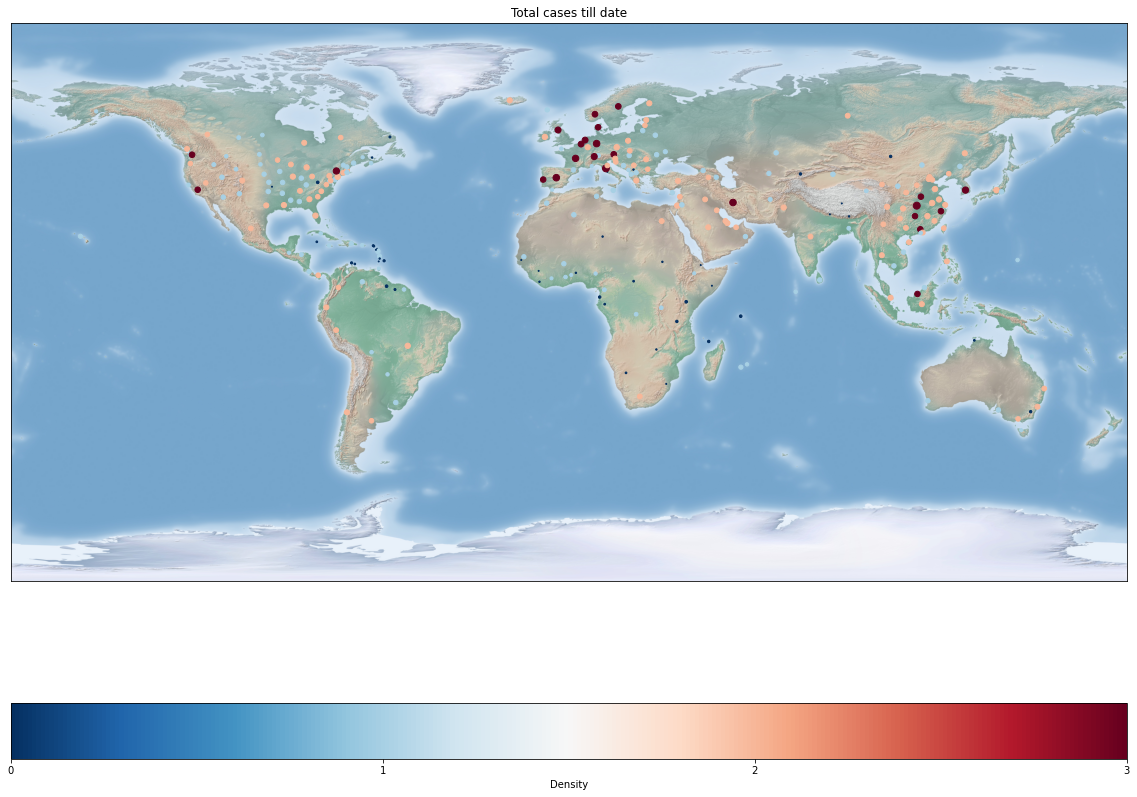

In [ ]:
fig = plt.figure(figsize=(20, 15), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, )
m.shadedrelief()
m.scatter(latlongCases[:,1], latlongCases[:,0], latlon=True, c=densityC, s=sizeC, cmap='RdBu_r', alpha=1)
plt.colorbar(orientation="horizontal", label='Density', ticks=[0, 1, 2, 3])
plt.clim(0,3)
plt.title('Total cases till date', loc='center')

In [ ]:
sizeF, densityF=Scale(latlongFatalities[:,2])

Text(0.5, 1.0, 'Total deaths till date')

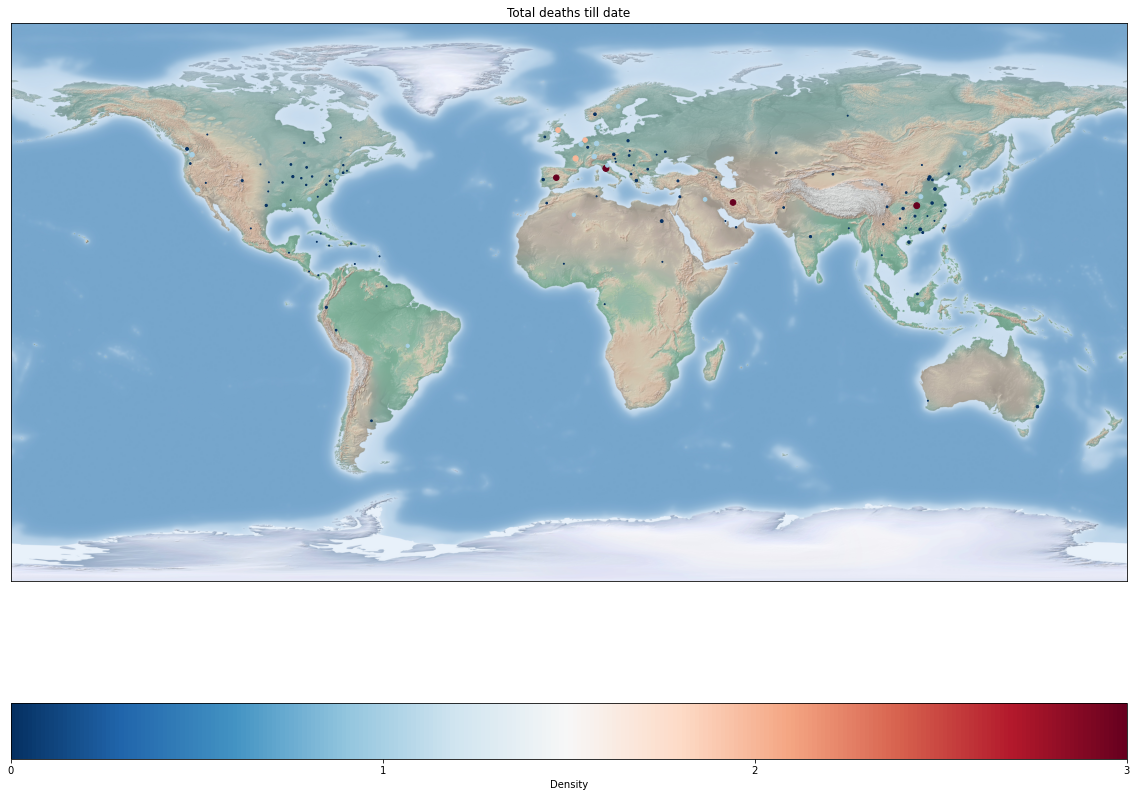

In [ ]:
fig = plt.figure(figsize=(20, 15), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, )
m.shadedrelief()
m.scatter(latlongCases[:,1], latlongCases[:,0], latlon=True, c=densityF, s=sizeF, cmap='RdBu_r', alpha=1)
plt.colorbar(orientation="horizontal", label='Density', ticks=[0, 1, 2, 3])
plt.clim(0,3)
plt.title('Total deaths till date', loc='center')

In [ ]:
//TODO: Recovered is labelled as deaths till date

In [ ]:
sizeR, densityR=Scale(latlongRecovered[:,2])

Text(0.5, 1.0, 'Total deaths till date')

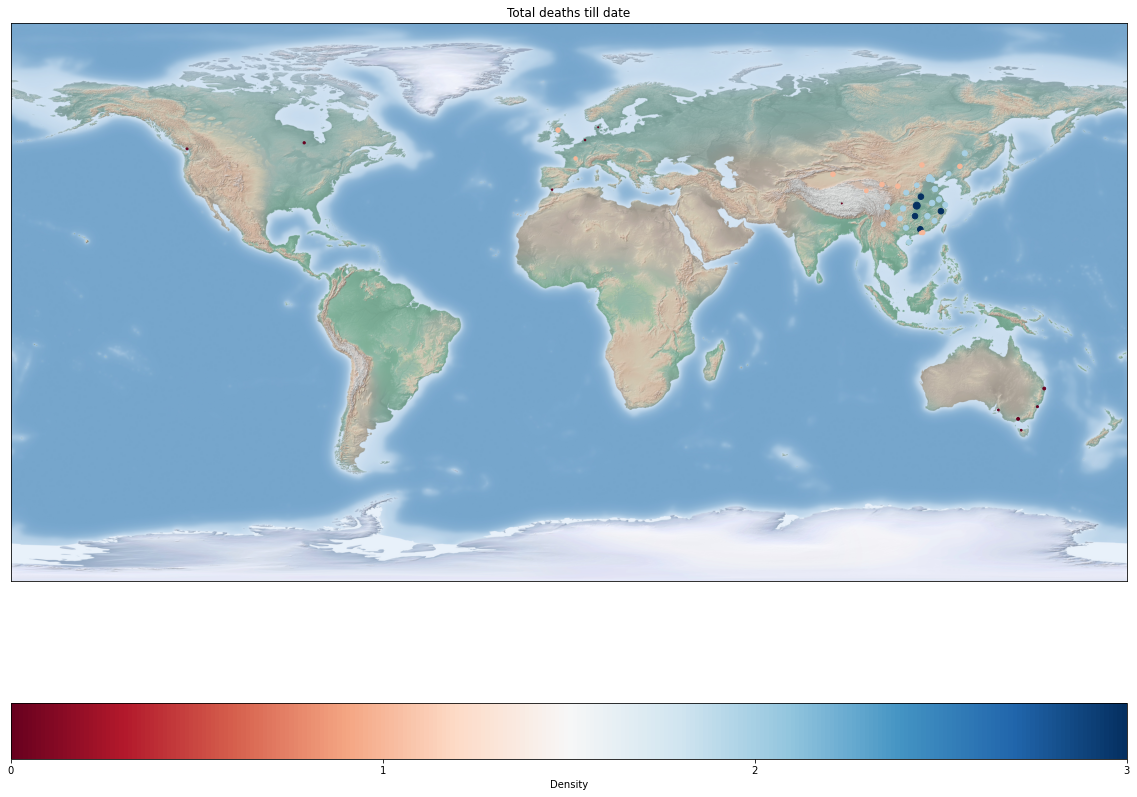

In [ ]:
fig = plt.figure(figsize=(20, 15), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, )
m.shadedrelief()
m.scatter(latlongCases[:,1], latlongCases[:,0], latlon=True, c=densityR, s=sizeR, cmap='RdBu', alpha=1)
plt.colorbar(orientation="horizontal", label='Density', ticks=[0, 1, 2, 3])
plt.clim(0,3)
plt.title('Total deaths till date', loc='center')

In [ ]:
sizeA, densityA=Scale(latlongActive[:,2])

Text(0.5, 1.0, 'Total active cases till date')

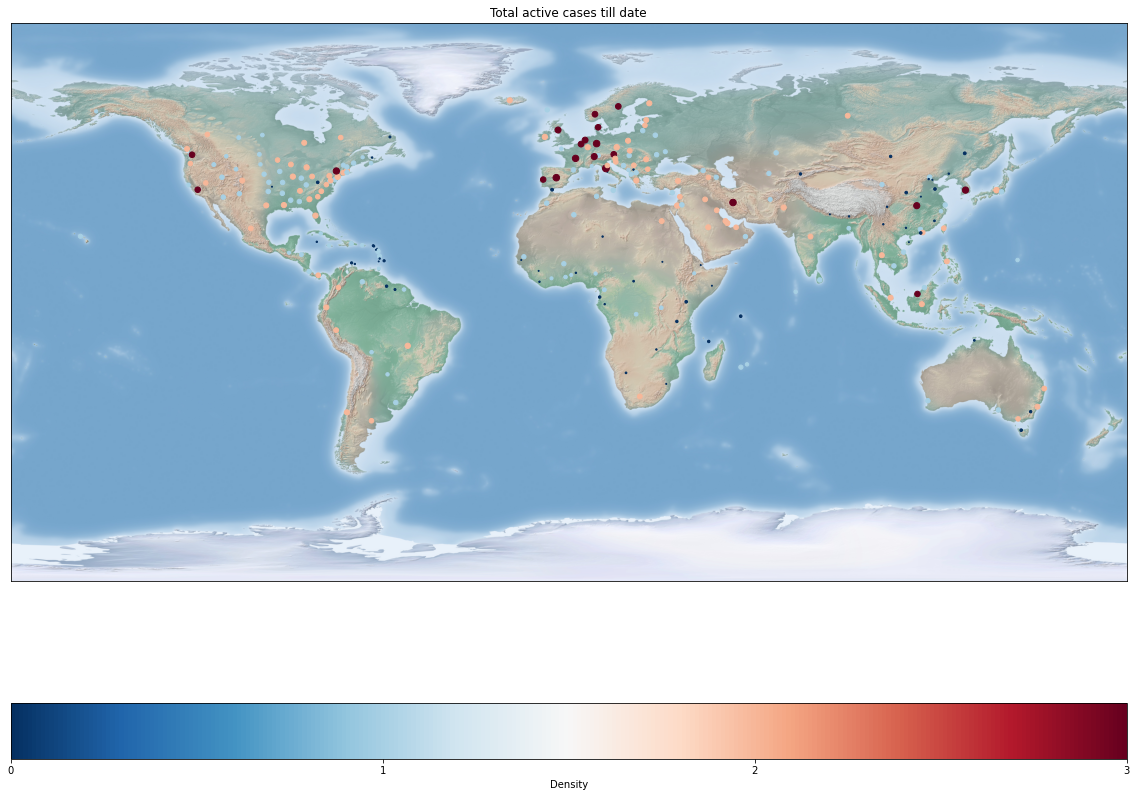

In [ ]:
fig = plt.figure(figsize=(20, 15), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, )
m.shadedrelief()
m.scatter(latlongCases[:,1], latlongCases[:,0], latlon=True, c=densityA, s=sizeA, cmap='RdBu_r', alpha=1)
plt.colorbar(orientation="horizontal", label='Density', ticks=[0, 1, 2, 3])
plt.clim(0,3)
plt.title('Total active cases till date', loc='center')

In [ ]:
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

In [ ]:
'''Aggregated Global Chart'''

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


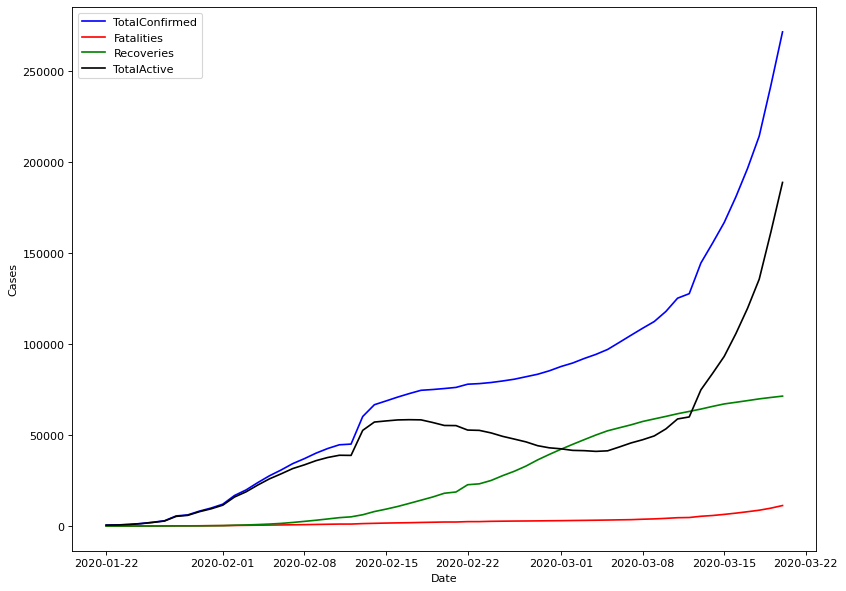

In [ ]:
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
x = date.astype("M8[ms]").tolist()
plt.plot(x, Vals[:,0], 'b-', label='TotalConfirmed')
plt.plot(x, Vals[:,1], 'r-', label='Fatalities')
plt.plot(x, Vals[:,2], 'g-', label='Recoveries')
plt.plot(x, Vals[:,3], 'k-', label='TotalActive')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()

In [ ]:
'''How each latitude region aggregated data is seen'''

In [ ]:
GrpDt=train.groupby(['Date'])
date=removeDuplicates(train['Date'].values)
temp=[]
i=0
while i<len(date):
  temp.append(date[i])
  i=i+8
date=temp

No handles with labels found to put in legend.


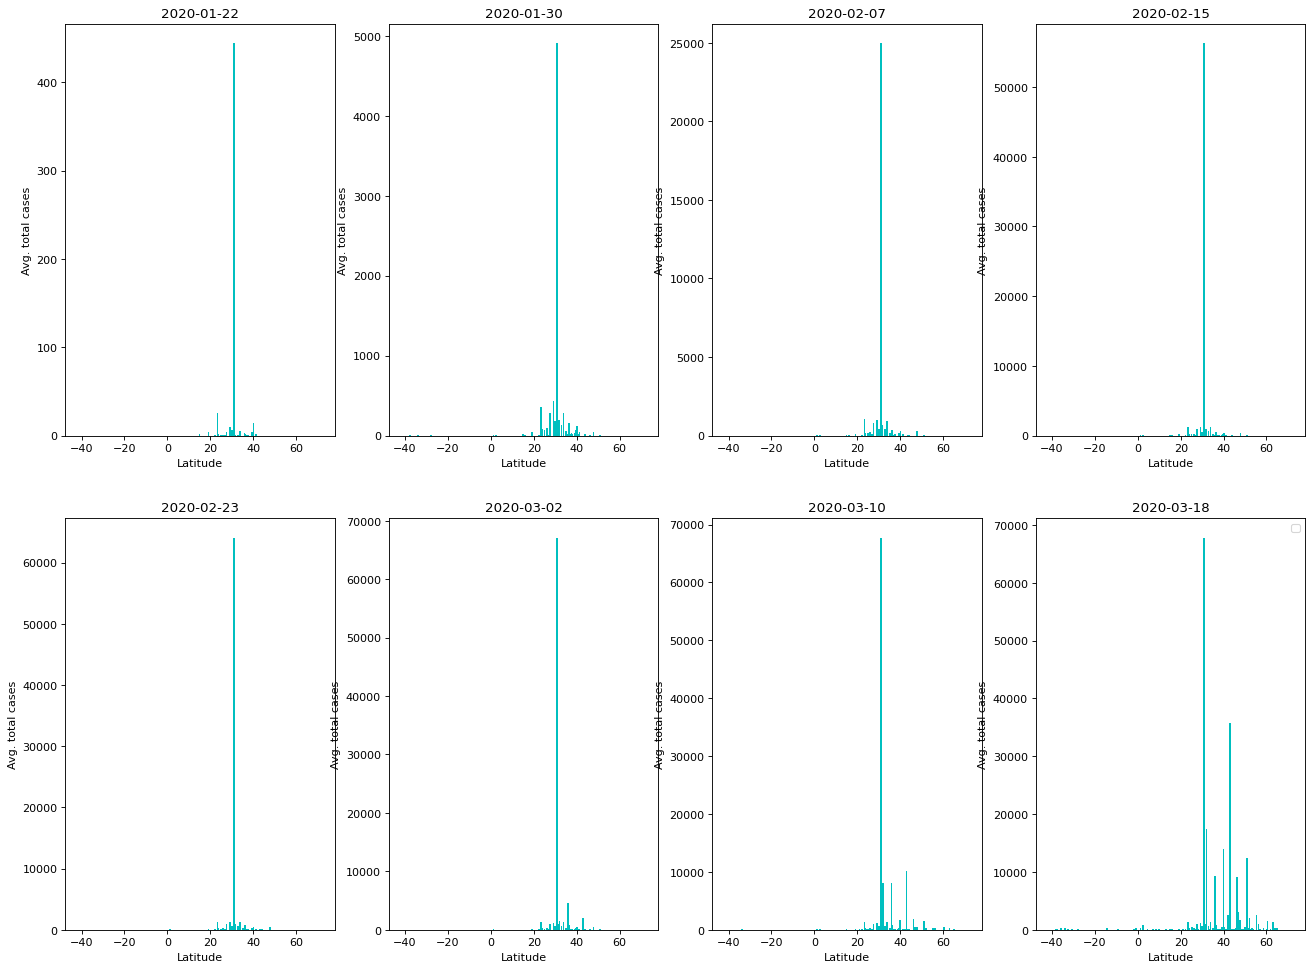

In [ ]:
fig=plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
j=1
for i in date:
  df=GrpDt.get_group(i)
  latCases=Count(df, ['Lat'], ['ConfirmedCases'], Average=True)  
  ax = fig.add_subplot(2,int(len(date)/2),j)
  ax.bar(latCases[:,0], latCases[:,1], color='c')
  ax.set_title(i)
  ax.set_xlabel('Latitude')
  ax.set_ylabel('Avg. total cases')
  j+=1
plt.legend()

No handles with labels found to put in legend.


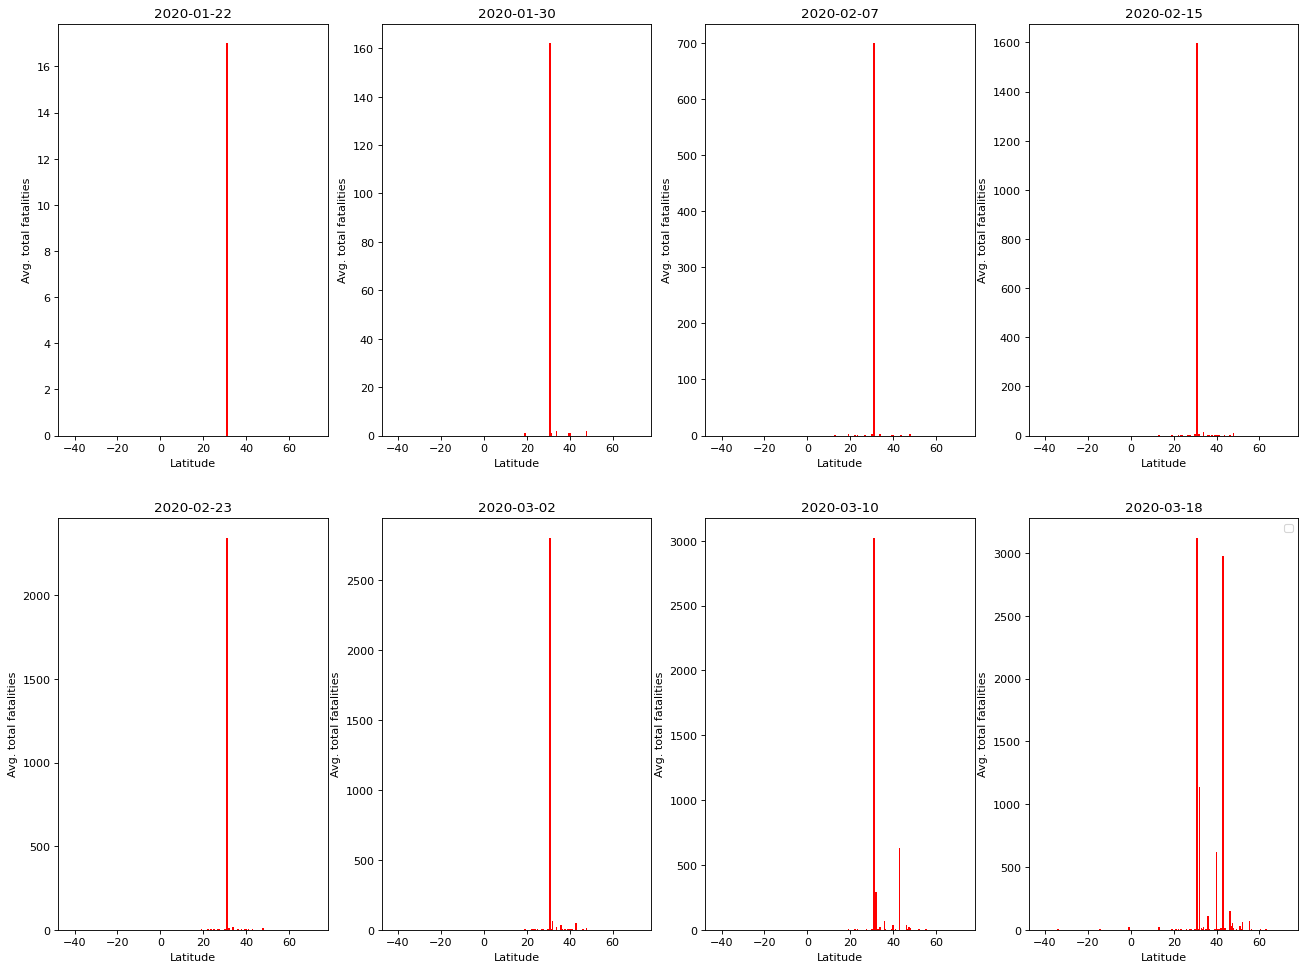

In [ ]:
fig=plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
j=1
for i in date:
  df=GrpDt.get_group(i)
  latFatalities=Count(df, ['Lat'], ['Fatalities'], Average=True)  
  ax = fig.add_subplot(2,int(len(date)/2),j)
  ax.bar(latFatalities[:,0], latFatalities[:,1], color='r')
  ax.set_title(i)
  ax.set_xlabel('Latitude')
  ax.set_ylabel('Avg. total fatalities')
  j+=1
plt.legend()

No handles with labels found to put in legend.


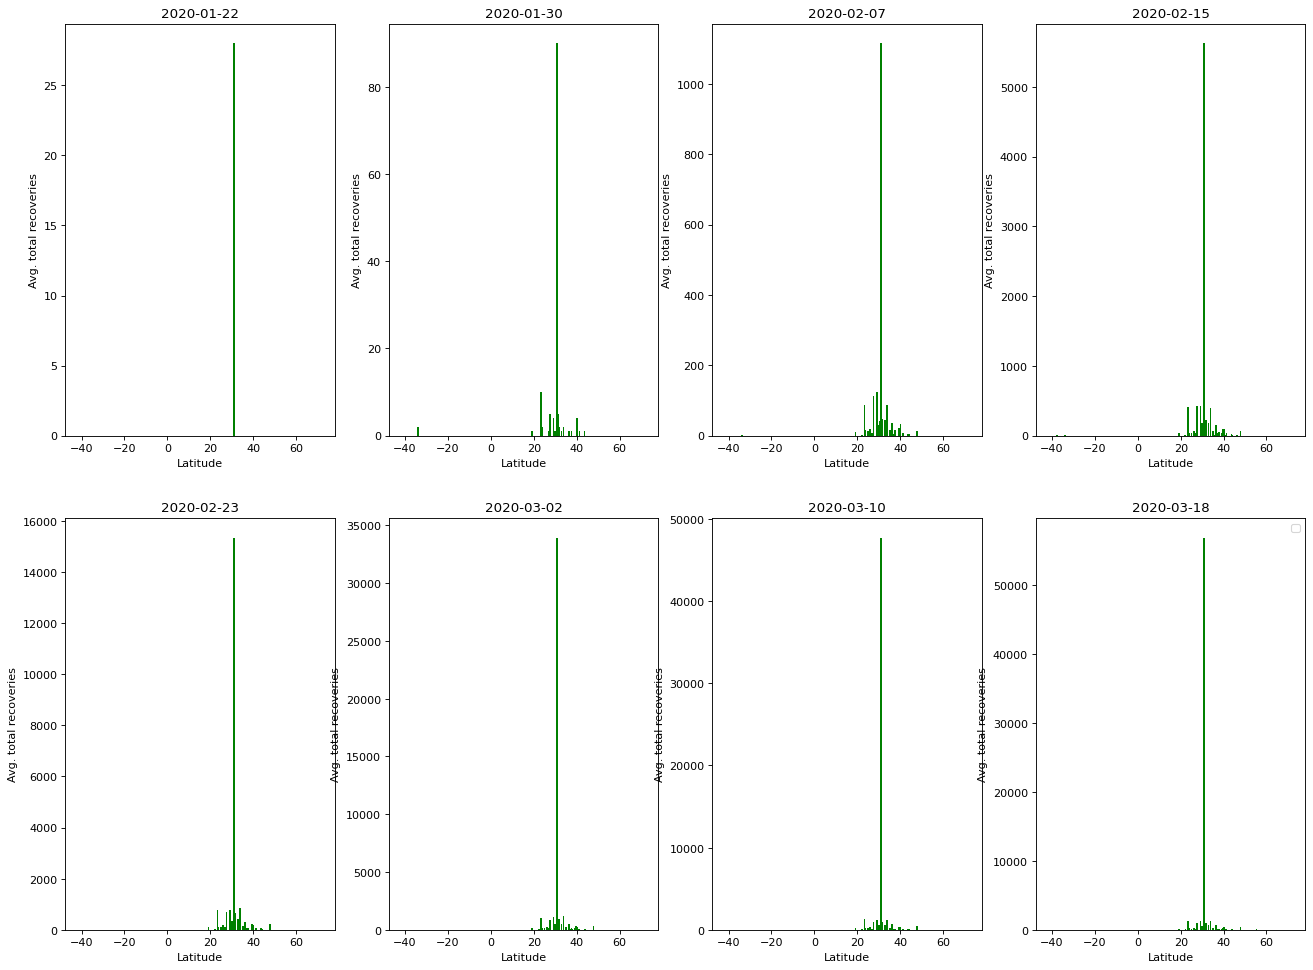

In [ ]:
fig=plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
j=1
for i in date:
  df=GrpDt.get_group(i)
  latRecovered=Count(df, ['Lat'], ['Recovered'], Average=True)  
  ax = fig.add_subplot(2,int(len(date)/2),j)
  ax.bar(latRecovered[:,0], latRecovered[:,1], color='g')
  ax.set_title(i)
  ax.set_xlabel('Latitude')
  ax.set_ylabel('Avg. total recoveries')
  j+=1
plt.legend()

No handles with labels found to put in legend.


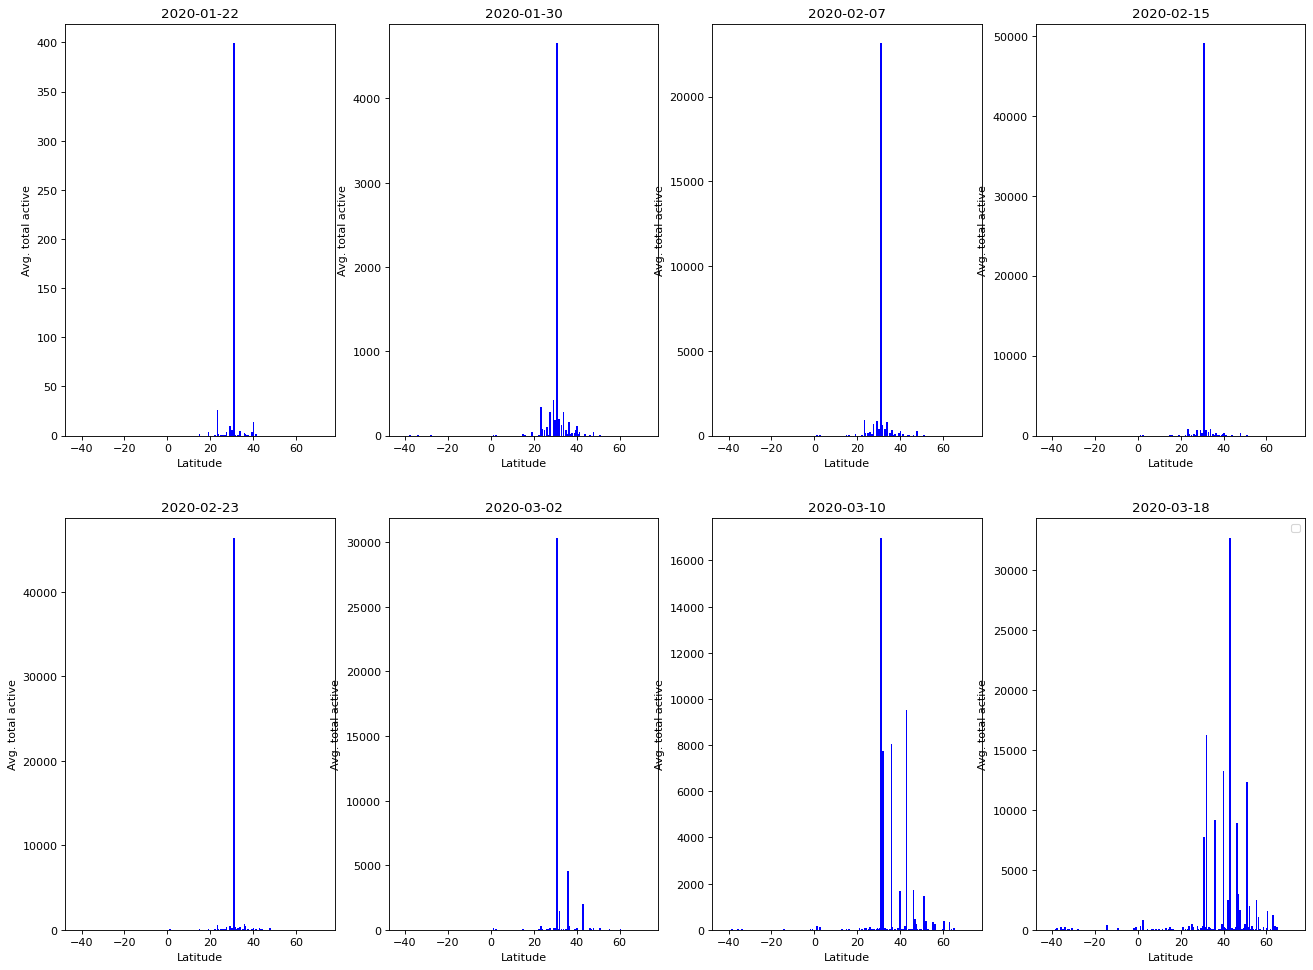

In [ ]:
fig=plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
j=1
for i in date:
  df=GrpDt.get_group(i)
  latActive=Count(df, ['Lat'], ['Active'], Average=True)  
  ax = fig.add_subplot(2,int(len(date)/2),j)
  ax.bar(latActive[:,0], latActive[:,1], color='b')
  ax.set_title(i)
  ax.set_xlabel('Latitude')
  ax.set_ylabel('Avg. total active')
  j+=1
plt.legend()

In [ ]:
'''Doesn't seem like latitude's and hence weather is playing any role'''

In [ ]:
'''Interesting part: We are trying to predict future course of cases using a CNN-LSTM model, yeah seems exagaretted to use an algorithm for video analysis and prediction to this case'''
'''Well we actually are consideringeach latitude as one group, a 1D convoloution layer, and like in a video all pixel have influence on next frame and pixels influence each other, we estimate cases in latitude are influences
by the travelling of people from one latitude to another'''
'''So lets try it out'''

In [ ]:
lx=['Lat','Long','ConfirmedCases','Fatalities','Recovered','Active']
ly=removeDuplicates(tolist(train[['Lat','Long']].values))
lz=removeDuplicates(train['Date'].values)
dataset=np.empty((len(ly),len(lx),0))
for i in lz:
  df=GrpDt.get_group(i)
  temp=df[lx].values
  dataset=np.dstack((dataset, temp))

In [ ]:
# y_min=np.min(dataset, axis=0)
# y_min=np.reshape(y_min, (1,y_min.shape[0],y_min.shape[1]))
# dataset=dataset-y_min
# y_max=np.max(dataset, axis=0)
# y_max=np.reshape(y_max, (1,y_max.shape[0],y_max.shape[1]))
# dataset=dataset/y_max

In [ ]:
z_mean=np.mean(dataset[:,2:6,:], axis=2)
z_mean=np.reshape(z_mean, (z_mean.shape[0],z_mean.shape[1],1))
z_std=np.std(dataset[:,2:6,:], axis=2)
# z_std=np.reshape(z_std, (z_std.shape[0],z_std.shape[1],1))
dataset[:,2:6,:]=(dataset[:,2:6,:]-z_mean)/(1+z_std)

In [ ]:
dataset[:,2:6,0]

In [ ]:
'''Converting the data to be used in CNN-LSTM model'''

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = dataset.shape[2] - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[:,:,indices])

    if single_step:
      labels.append(target[:,:,i+target_size])
    else:
      labels.append(target[:,:,i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
TRAIN_SPLIT = int(0.6*len(lz))
past_history = 10
future_target = 3
STEP=1
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 2:6, :], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 2:6, :],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)


In [ ]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU, SimpleRNN, Conv1D, TimeDistributed, MaxPooling2D, Flatten, Dropout, Reshape
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
BUFFER_SIZE=10000
BATCH_SIZE=10
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=5, kernel_size=5, activation='relu', padding='same'), batch_input_shape=(None, x_train_multi.shape[1], x_train_multi.shape[2], x_train_multi.shape[3])))
model.add(TimeDistributed(Conv1D(filters=10, kernel_size=2, activation='relu', padding='same')))
model.add(TimeDistributed(Conv1D(filters=3, kernel_size=1, activation='relu', padding='same')))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(10))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(y_train_multi.shape[1]*y_train_multi.shape[2]*y_train_multi.shape[3], activation='relu'))
model.add(Reshape((y_train_multi.shape[1], y_train_multi.shape[2], y_train_multi.shape[3])))
model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mse', metrics=['mse', 'accuracy'])

In [ ]:
multi_step_model=model.fit(train_data_multi, batch_size=x_train_multi.shape[0], epochs=200, steps_per_epoch=x_train_multi.shape[0], validation_data=val_data_multi, validation_steps=x_val_multi.shape[0])

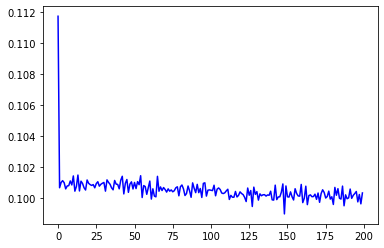

In [ ]:
loss = multi_step_model.history['mse']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')

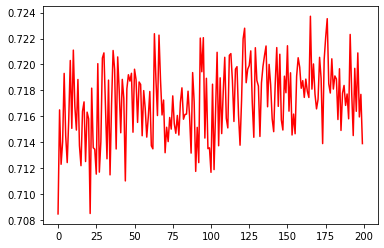

In [ ]:
val_loss = multi_step_model.history['val_mse']
epochs = range(len(val_loss))
plt.figure()
plt.plot(epochs, val_loss, 'r', label='Validation loss')

In [ ]:
for x,y in train_data_multi.take(2):
  print(np.sum(x[0,:,2,:],axis=0).shape)
  break
np.array([0,1,2]).shape

(10,)


(3,)

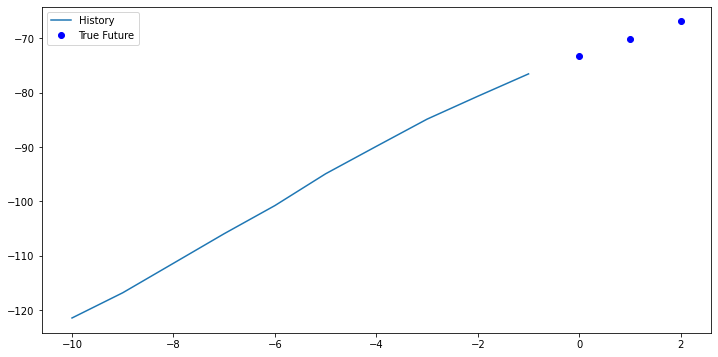

In [ ]:
for x, y in train_data_multi.take(1):
  multi_step_plot(np.sum(x[0,:,2,:],axis=0), np.sum(y[0,:,0,:],axis=0), np.array([0]))

In [ ]:
for x, y in val_data_multi.take(1):
  print (model.predict(x).shape)

(10, 275, 4, 3)


In [ ]:
'''Train Data fits with a bias'''

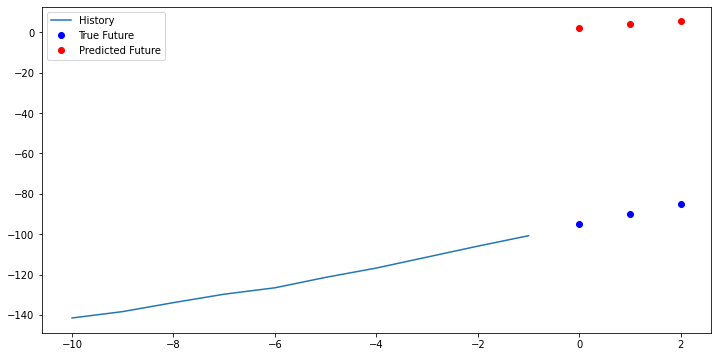

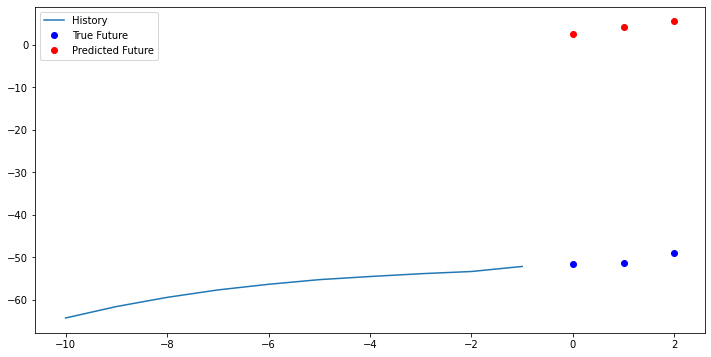

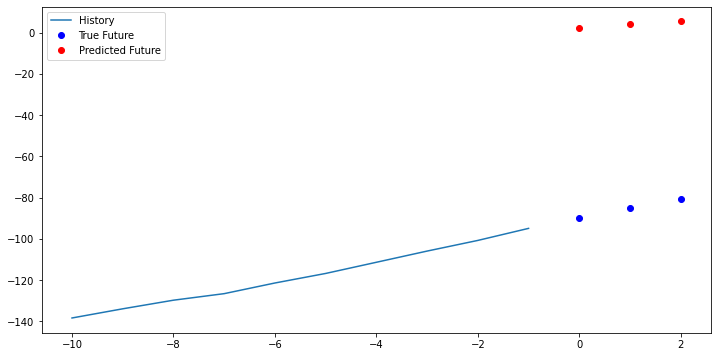

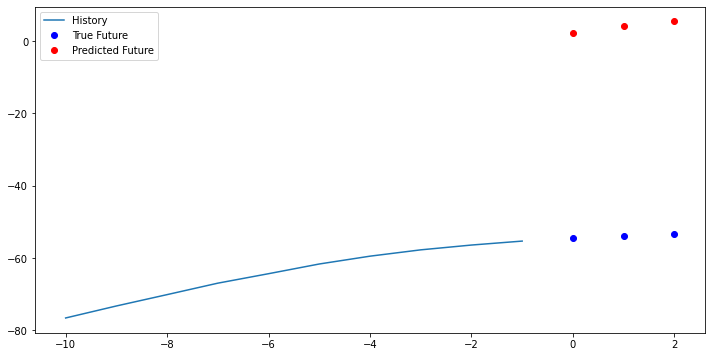

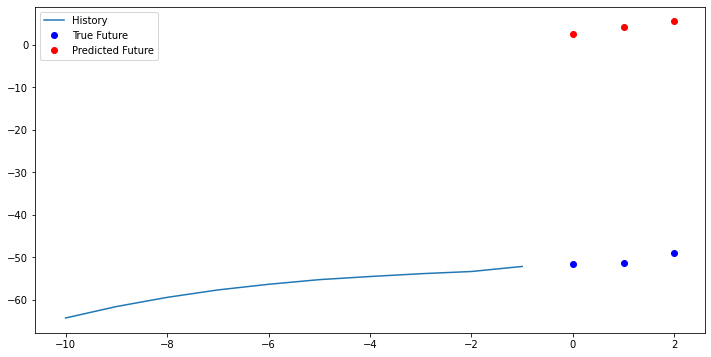

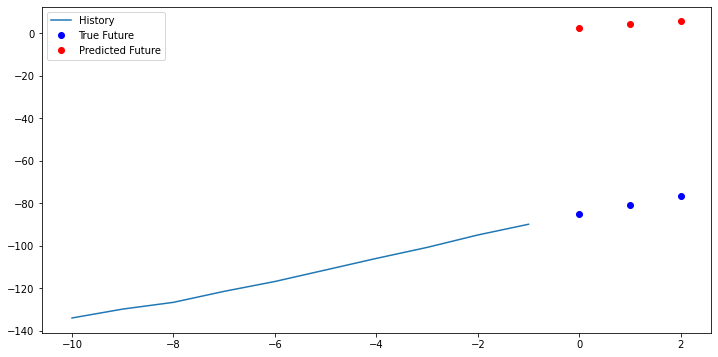

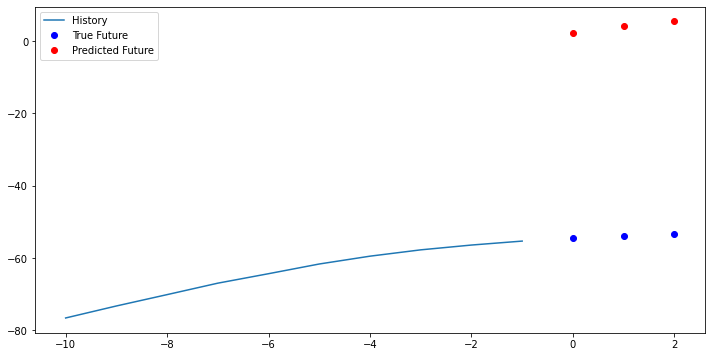

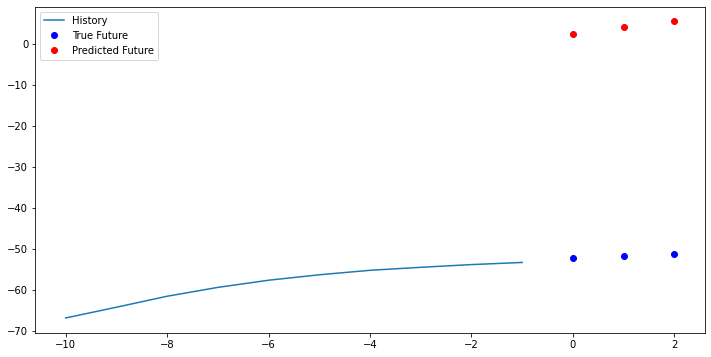

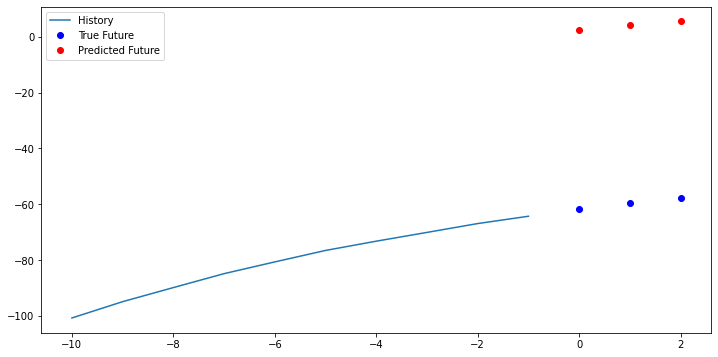

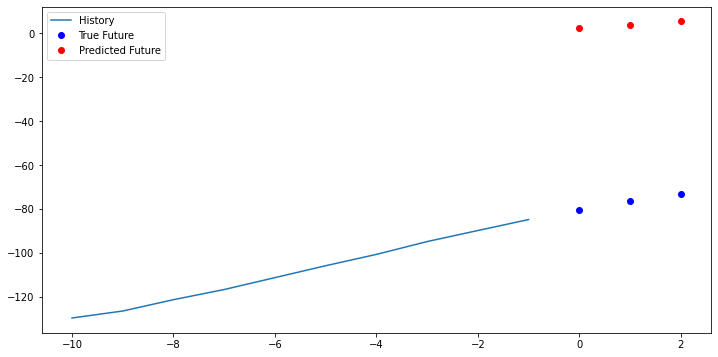

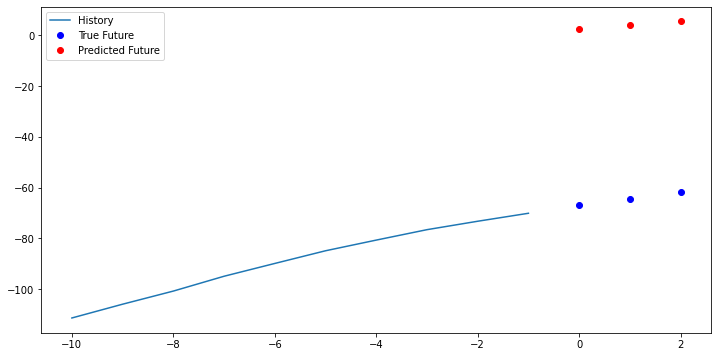

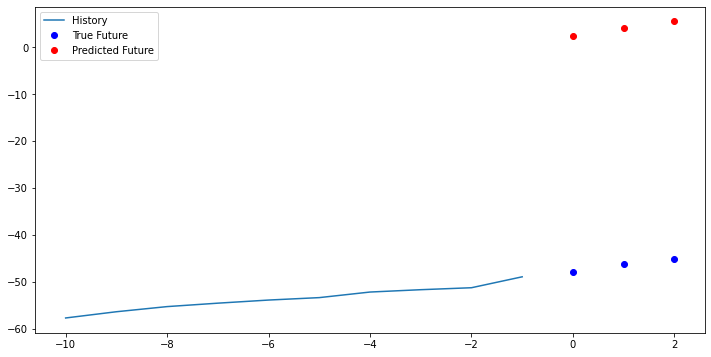

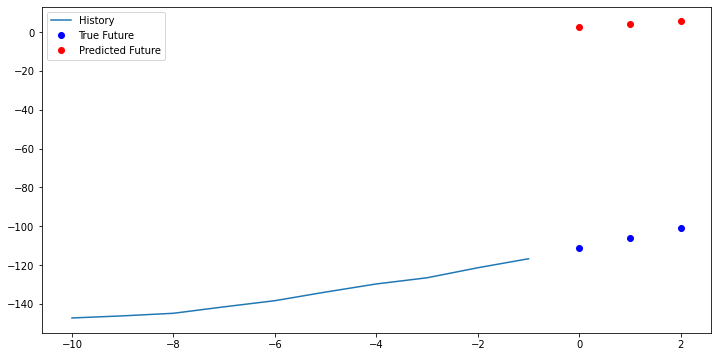

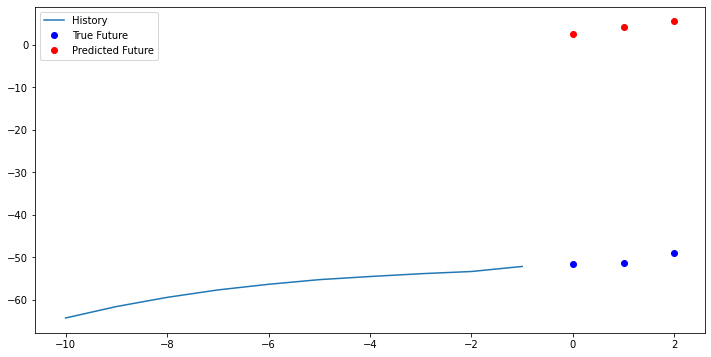

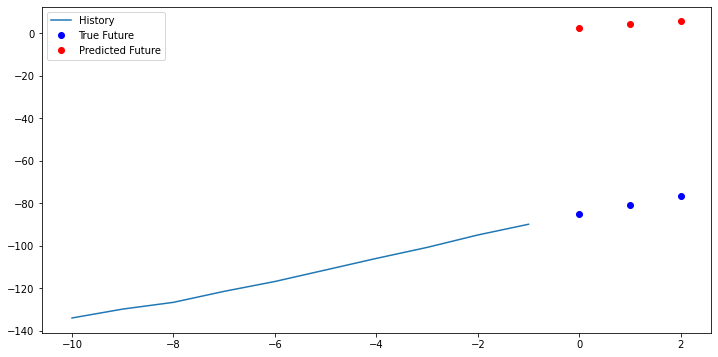

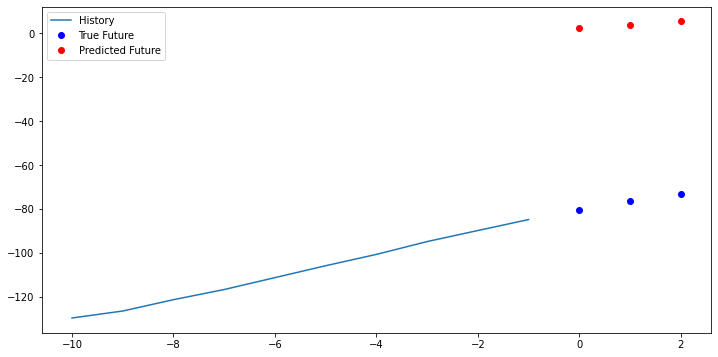

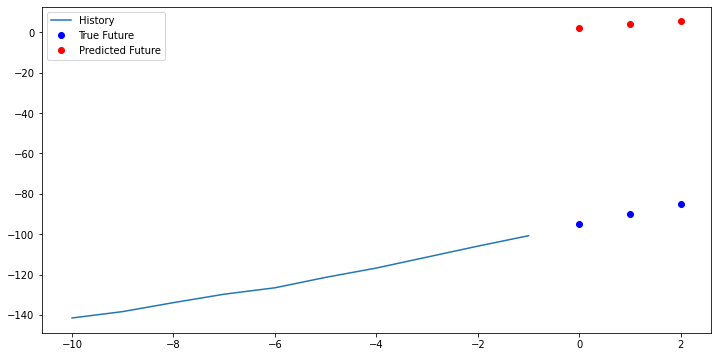

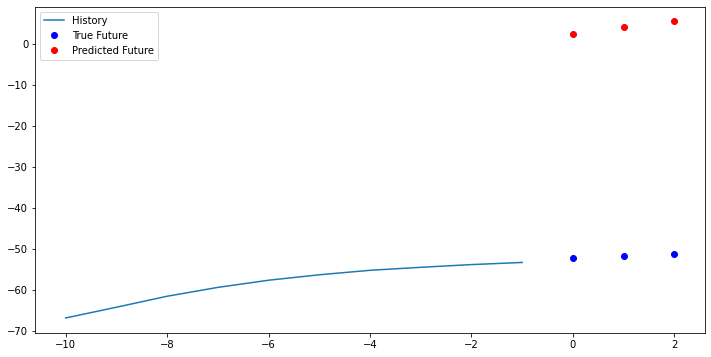

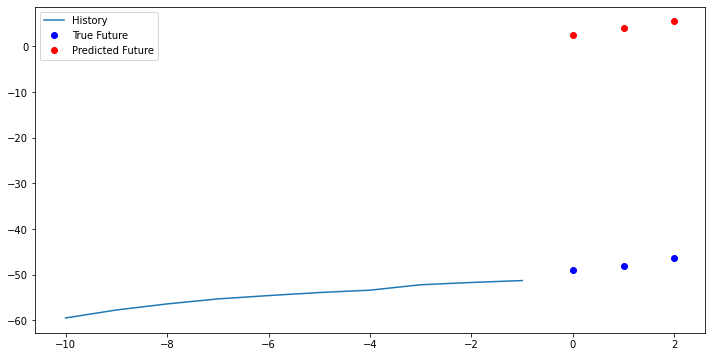

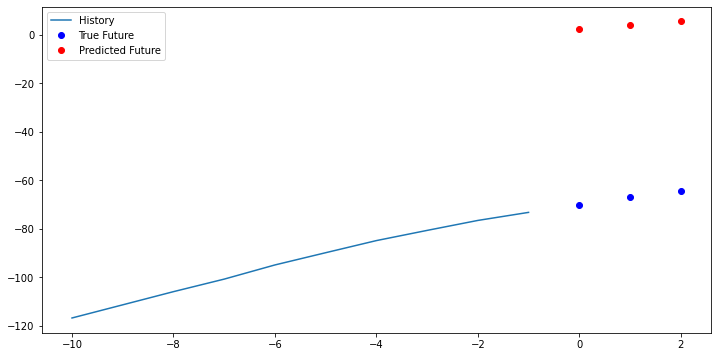

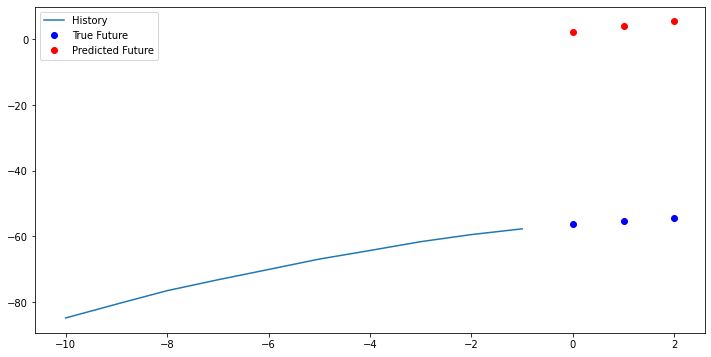

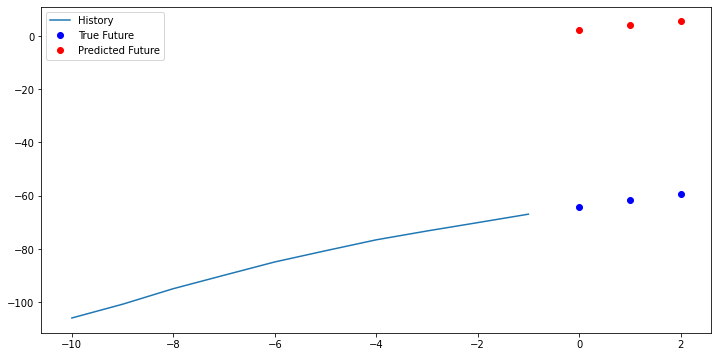

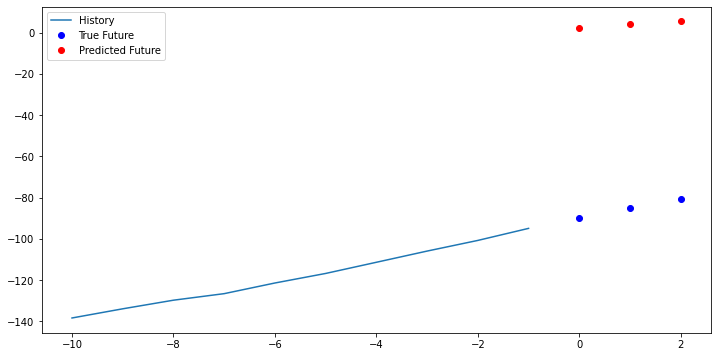

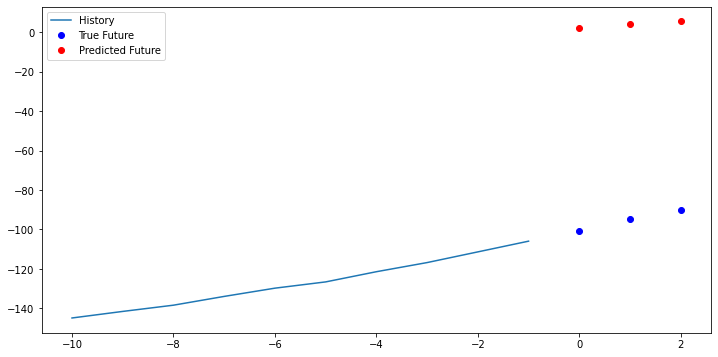

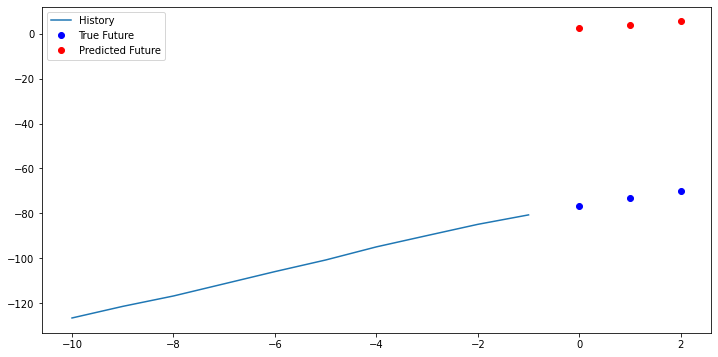

In [ ]:
for x, y in train_data_multi.take(x_train_multi.shape[0]):
  x_=np.sum(x[0,:,2,:],axis=0)
  y_=np.sum(y[0,:,0,:],axis=0)
  j=model.predict(x)
  ypred=np.sum(j[0,:,0,:],axis=0)
  multi_step_plot(x_, y_, ypred)

In [ ]:
'''Val data able to get trend and start point and is able to predict next 3 days cases based on past 7 days data'''

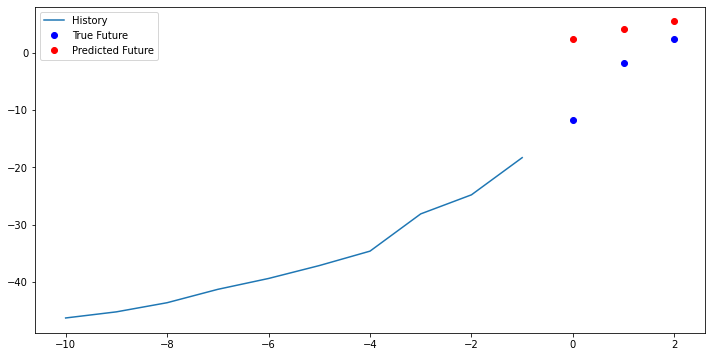

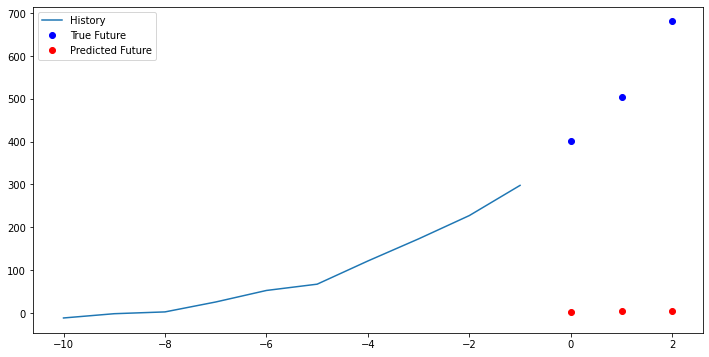

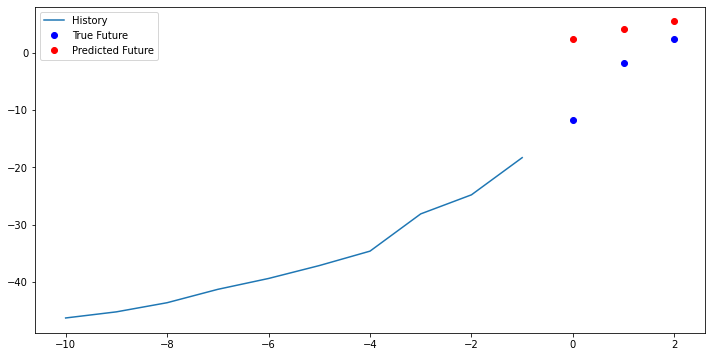

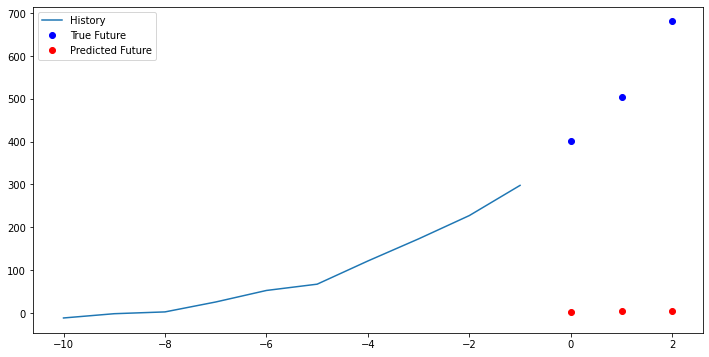

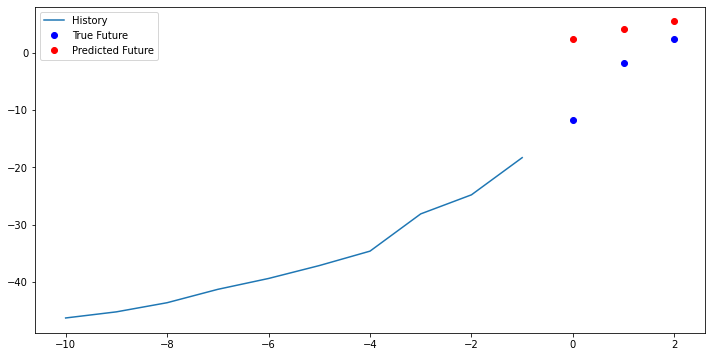

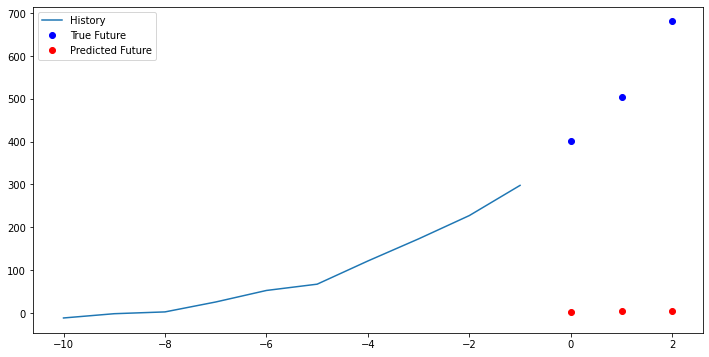

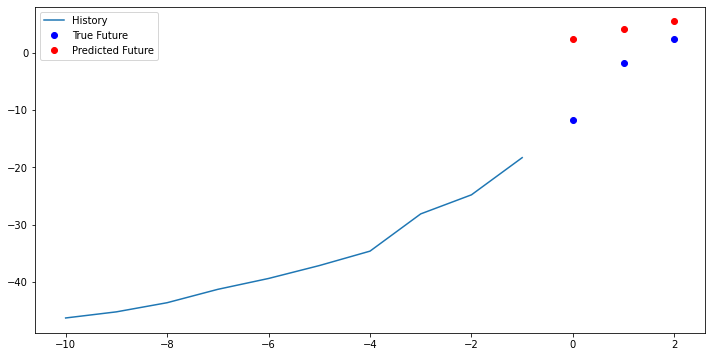

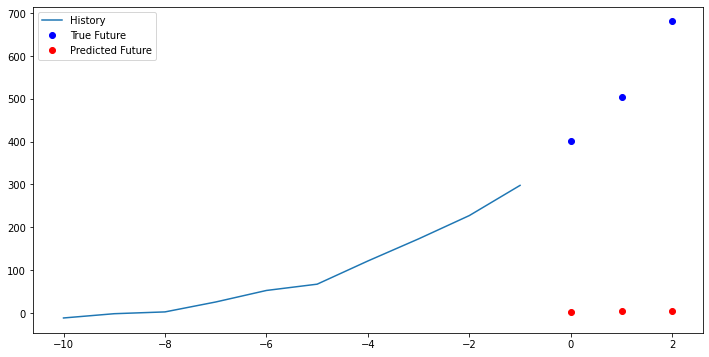

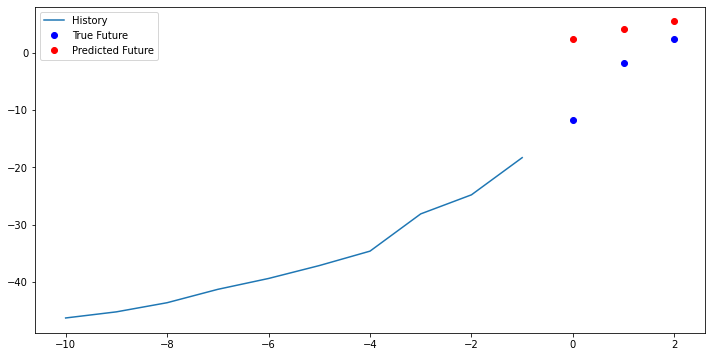

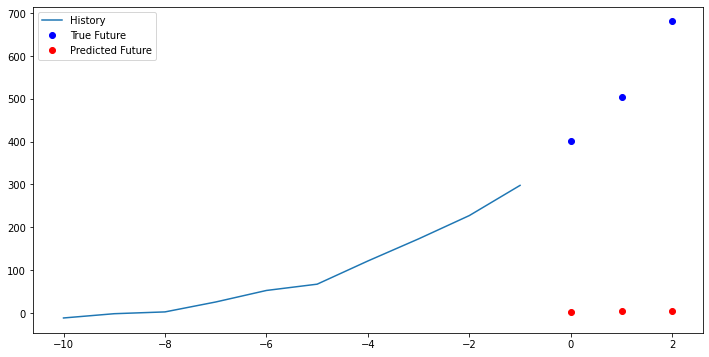

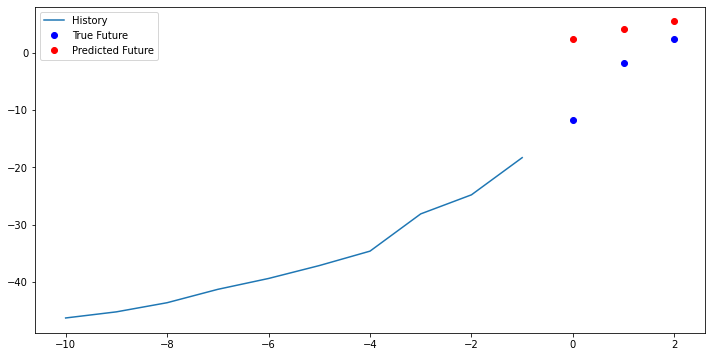

In [ ]:
for x, y in val_data_multi.take(x_val_multi.shape[0]):
  x_=np.sum(x[0,:,2,:],axis=0)
  y_=np.sum(y[0,:,0,:],axis=0)
  j=model.predict(x)
  ypred=np.sum(j[0,:,0,:],axis=0)
  multi_step_plot(x_, y_, ypred)

In [ ]:
'''Future actions: Take care of biasness in predictions'''
'''Can be generalized to all epidemic spread, where we can see how much influence migration has on spreading''' 